In [1]:
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Load the AAPL stock price dataset
df = pd.read_csv('AAPL_alpha_vantage.csv')

# Inspect dataset columns
print("Dataset columns:", df.columns)

Dataset columns: Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


In [2]:
# Check for missing values
if df.isnull().sum().any():
    raise ValueError("Dataset contains missing values. Please clean the data.")


In [3]:
df.isnull().sum()

date         0
1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [5]:
df.head()

date  1. open  2. high    3. low  4. close   5. volume
0  2025-01-07   242.98   245.55  241.3500    242.21  40855960.0
1  2025-01-06   244.31   247.33  243.2000    245.00  45045571.0
2  2025-01-03   243.36   244.18  241.8900    243.36  40244114.0
3  2025-01-02   248.93   249.10  241.8201    243.85  55740731.0
4  2024-12-31   252.44   253.28  249.4300    250.42  39480718.0

In [6]:
# 2. Prepare the data for Prophet
# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])


In [7]:
# Rename columns to match Prophet's expected format
df = df.rename(columns={'date': 'ds', '4. close': 'y'})

# Check the data structure
print(df.head())

          ds  1. open  2. high    3. low       y   5. volume
0 2025-01-07   242.98   245.55  241.3500  242.21  40855960.0
1 2025-01-06   244.31   247.33  243.2000  245.00  45045571.0
2 2025-01-03   243.36   244.18  241.8900  243.36  40244114.0
3 2025-01-02   248.93   249.10  241.8201  243.85  55740731.0
4 2024-12-31   252.44   253.28  249.4300  250.42  39480718.0


In [8]:
df.drop(['1. open','2. high','3. low','5. volume'], axis=1, inplace=True)

In [9]:
df.head()

ds       y
0 2025-01-07  242.21
1 2025-01-06  245.00
2 2025-01-03  243.36
3 2025-01-02  243.85
4 2024-12-31  250.42

In [10]:
df.tail()

ds      y
6331 1999-11-05  88.31
6332 1999-11-04  83.62
6333 1999-11-03  81.50
6334 1999-11-02  80.25
6335 1999-11-01  77.62

In [11]:
# 3. Train the model
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)


16:08:09 - cmdstanpy - INFO - Chain [1] start processing
16:08:12 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# 4. Create future dataframe
future = m.make_future_dataframe(periods=365, freq='D')  # Forecast for the next year
forecast = m.predict(future)

In [17]:
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    1999-11-01   80.921238   -3.958590  198.104090    80.921238    80.921238   
1    1999-11-02   80.778083    3.864019  197.305187    80.778083    80.778083   
2    1999-11-03   80.634928    1.497376  201.771701    80.634928    80.634928   
3    1999-11-04   80.491774   -2.342991  204.850316    80.491774    80.491774   
4    1999-11-05   80.348619    1.421353  206.324109    80.348619    80.348619   
...         ...         ...         ...         ...          ...          ...   
6696 2026-01-03  135.470502   32.221289  278.406516    58.949512   210.581615   
6697 2026-01-04  135.445549   26.760919  267.878708    58.647951   210.882251   
6698 2026-01-05  135.420596   27.627620  288.787285    58.346390   211.179992   
6699 2026-01-06  135.395643   25.720519  283.945928    57.884507   211.477734   
6700 2026-01-07  135.370690   31.050967  271.440142    57.122849   211.775475   

      additive_terms  additive_terms_lower  additive_terms_upper      daily  \
0          20.078646             20.078646             20.078646  21.145033   
1          19.724275             19.724275             19.724275  21.145033   
2          19.028550             19.028550             19.028550  21.145033   
3          19.489775             19.489775             19.489775  21.145033   
4          18.891056             18.891056             18.891056  21.145033   
...              ...                   ...                   ...        ...   
6696       19.638419             19.638419             19.638419  21.145033   
6697       19.753707             19.753707             19.753707  21.145033   
6698       23.702418             23.702418             23.702418  21.145033   
6699       23.560923             23.560923             23.560923  21.145033   
6700       23.062292             23.062292             23.062292  21.145033   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0     ...  1.235147      1.235147      1.235147 -2.301534     -2.301534   
1     ...  1.074066      1.074066      1.074066 -2.494825     -2.494825   
2     ...  0.611282      0.611282      0.611282 -2.727766     -2.727766   
3     ...  1.337714      1.337714      1.337714 -2.992972     -2.992972   
4     ...  1.028047      1.028047      1.028047 -3.282024     -3.282024   
...   ...       ...           ...           ...       ...           ...   
6696  ... -2.643127     -2.643127     -2.643127  1.136513      1.136513   
6697  ... -2.643129     -2.643129     -2.643129  1.251802      1.251802   
6698  ...  1.235147      1.235147      1.235147  1.322237      1.322237   
6699  ...  1.074066      1.074066      1.074066  1.341823      1.341823   
6700  ...  0.611282      0.611282      0.611282  1.305976      1.305976   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0        -2.301534                   0.0                         0.0   
1        -2.494825                   0.0                         0.0   
2        -2.727766                   0.0                         0.0   
3        -2.992972                   0.0                         0.0   
4        -3.282024                   0.0                         0.0   
...            ...                   ...                         ...   
6696      1.136513                   0.0                         0.0   
6697      1.251802                   0.0                         0.0   
6698      1.322237                   0.0                         0.0   
6699      1.341823                   0.0                         0.0   
6700      1.305976                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0  100.999884  
1                            0.0  100.502357  
2                            0.0   99.663478  
3                            0.0   99.981548  
4                            0.0   99.239675  
...                          ...         ..

<Figure size 720x432 with 0 Axes>

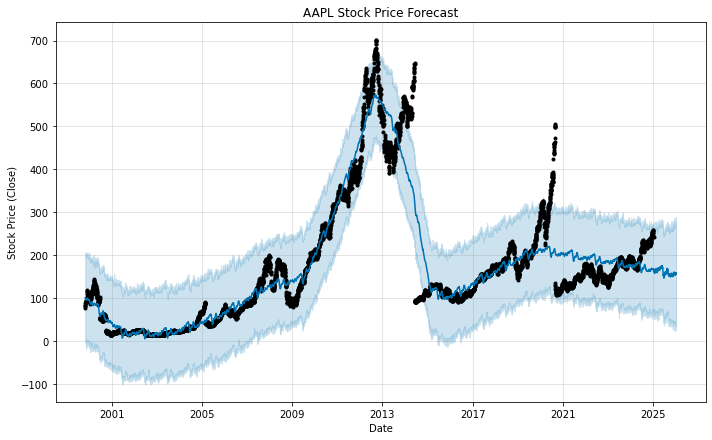

In [13]:
# 5. Visualization
# Plot the forecast
plt.figure(figsize=(10, 6))
m.plot(forecast)
plt.title("AAPL Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Stock Price (Close)")
plt.show()

<Figure size 720x576 with 0 Axes>

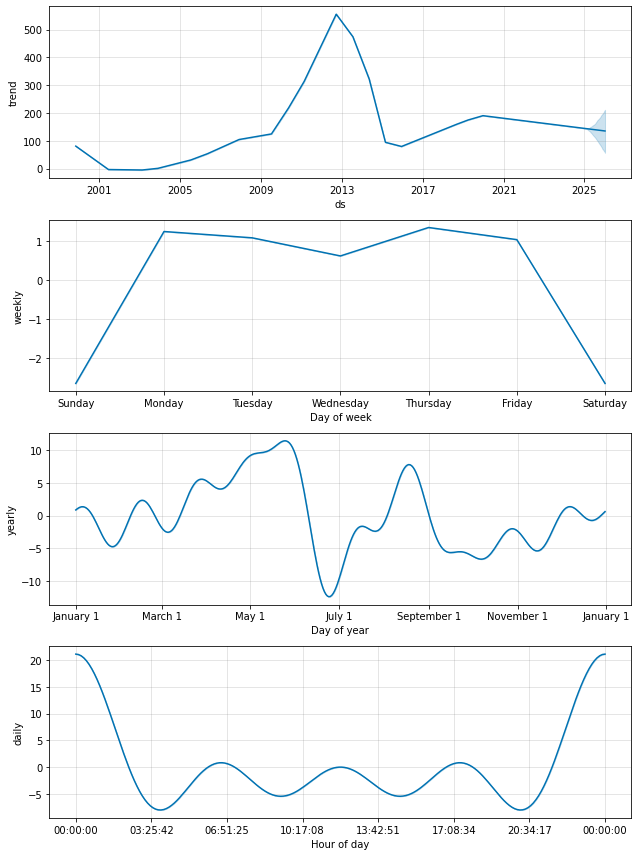

In [14]:
# Plot forecast components
plt.figure(figsize=(10, 8))
m.plot_components(forecast)
plt.show()


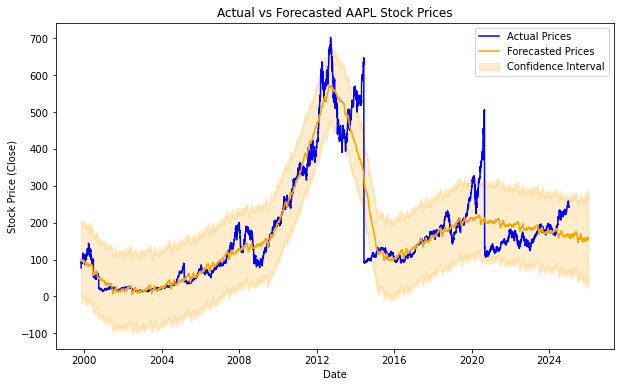

In [15]:
# Additional visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Actual Prices', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Prices', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2, label='Confidence Interval')
plt.title("Actual vs Forecasted AAPL Stock Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price (Close)")
plt.legend()
plt.show()

In [24]:
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Load the AAPL stock price dataset
dff = pd.read_csv('AAPL_alpha_vantage.csv')

# Inspect dataset columns
print("Dataset columns:", dff.columns)

Dataset columns: Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


In [25]:
# 2. Prepare the data for Prophet
# Ensure the date column is in datetime format
dff['date'] = pd.to_datetime(dff['date'])



In [26]:
# Rename columns to match Prophet's expected format
dff = dff.rename(columns={'date': 'ds', '4. close': 'y'})

# Check the data structure
print(dff.head())

          ds  1. open  2. high    3. low       y   5. volume
0 2025-01-07   242.98   245.55  241.3500  242.21  40855960.0
1 2025-01-06   244.31   247.33  243.2000  245.00  45045571.0
2 2025-01-03   243.36   244.18  241.8900  243.36  40244114.0
3 2025-01-02   248.93   249.10  241.8201  243.85  55740731.0
4 2024-12-31   252.44   253.28  249.4300  250.42  39480718.0


In [27]:
dff.drop(['1. open','2. high','3. low','5. volume'], axis=1, inplace=True)

In [28]:
dff.head()

ds       y
0 2025-01-07  242.21
1 2025-01-06  245.00
2 2025-01-03  243.36
3 2025-01-02  243.85
4 2024-12-31  250.42

In [29]:
m=Prophet(
growth="linear",
#holidays=holidays,
#seasonality_mode="multiplicative",
changepoint_prior_scale=30,
seasonality_prior_scale=35,
##cap=3.00,
##floor=.65*125,
holidays_prior_scale=20,
daily_seasonality=False,
weekly_seasonality=False,
yearly_seasonality=False,
).add_seasonality(
  name='monthly',
  period=30.5,
  fourier_order=55
).add_seasonality(
  name='daily',
  period=1,
  fourier_order=15
).add_seasonality(
  name='weekly',
  period=7,
  fourier_order=20
).add_seasonality(
  name='yearly',
  period=365.25,
  fourier_order=20
).add_seasonality(
  name='quarterly',
  period=365.25/4,
  fourier_order=5,
  prior_scale=15)
m.fit(dff)

16:33:31 - cmdstanpy - INFO - Chain [1] start processing
16:34:07 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
predper = 365 

In [32]:
future=m.make_future_dataframe(periods=predper)
future.tail()

ds
6696 2026-01-03
6697 2026-01-04
6698 2026-01-05
6699 2026-01-06
6700 2026-01-07

In [33]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
6696 2026-01-03  140.273553   36.715558  244.640643
6697 2026-01-04  139.704860   36.058820  248.268846
6698 2026-01-05  155.483102   47.127220  271.993207
6699 2026-01-06  151.526968   53.998579  257.426778
6700 2026-01-07  152.308631   45.252454  253.095364

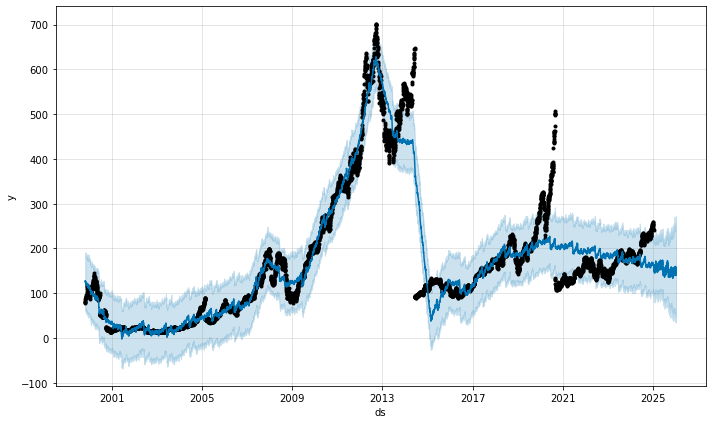

In [34]:
plot1=m.plot(forecast)

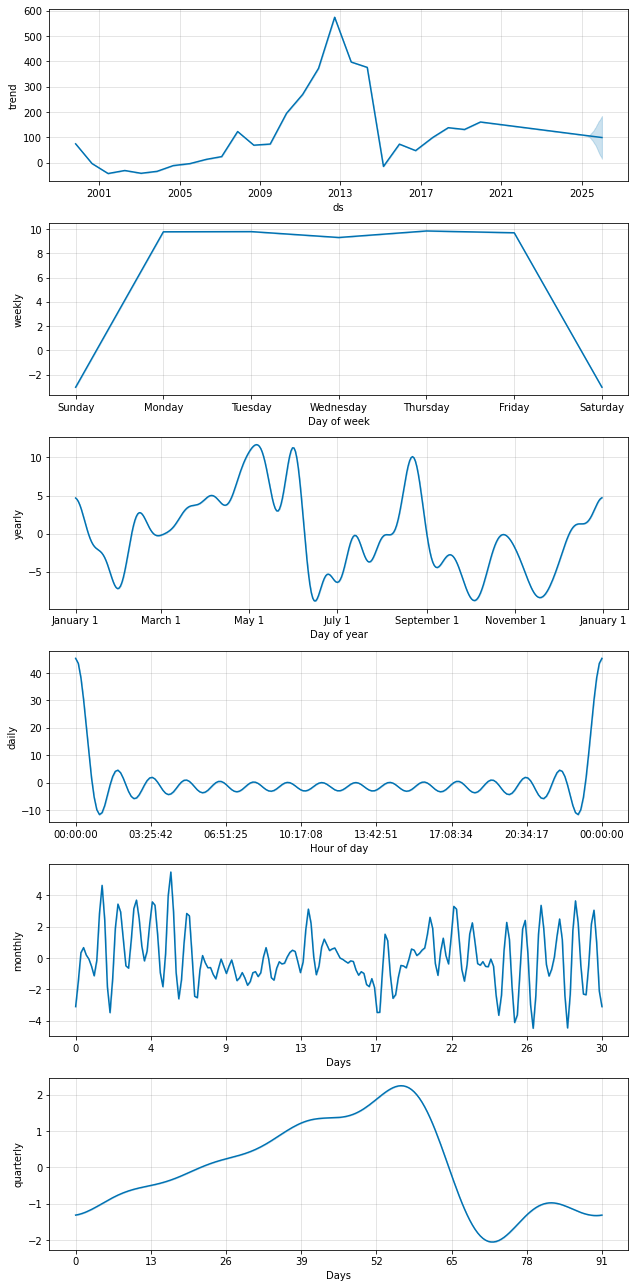

In [35]:
plot2=m.plot_components(forecast)

In [38]:
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [39]:
fig=plot_plotly(m, forecast)
py.iplot(fig)

In [40]:
df2=AV.data(symbol=ticker,function='DA')

NameError: name 'AV' is not defined